# Лабораторная работа №3

## Условие

Вариант №6

Распределения:

$$\mathbf{X_1} \sim \chi^2(2)$$
$$\mathbf{X_2} \sim N(3, 1)$$
$$\mathbf{X_3} \sim R(-2, 2)$$
$$\mathbf{X_4} \sim N(5, 1)$$


Объёмы выборок:

$$ n_1 = 100$$
$$ n_2 = 150$$
$$ n_3 = 200$$
$$ n_4 = 100$$


## Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Определения

In [2]:
nu1, n1 = 2, 100
m2, std2, n2 = 3, 1, 150
a3, b3, n3 = -2, 2, 200
m4, std4, n4 = 5, 1, 100


In [3]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=False)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [4]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## Исходные данные

## 1. Исходные данные

| СВ             | Распределение  | Параметры                         | Математическое ожидание, $m_i$ | Дисперсия, $\sigma_i^2$                          | Объём выборки, $n_i$ |
| -------------- | -------------- | --------------------------------- | ------------------------------ | ------------------------------------------------ | -------------------- |
| $\mathbf{X_1}$ | $\chi^2(2)$    | $\nu_1 = 2$                       | $m_1 = \nu_1 = 2$             | $\sigma_1^2 = 2\nu_1 = 4$                        | 100                  |
| $\mathbf{X_2}$ | $N(3,1)$        | $m_2 = 3,\ \sigma_2 = 1$         | $m_2 = 3$                      | $\sigma_2^2 = 1$                                 | 150                  |
| $\mathbf{X_3}$ | $R(-2,2)$       | $a_3=-2,\ b_3=2$                  | $m_3 = \dfrac{a_3+b_3}{2}=0$  | $\sigma_3^2=\dfrac{(b_3-a_3)^2}{12}=\dfrac{4}{3}$ | 200                  |
| $\mathbf{X_4}$ | $N(5,1)$        | $m_4 = 5,\ \sigma_4 = 1$         | $m_4 = 5$                      | $\sigma_4^2 = 1$                                 | 100                  |


In [5]:
k = 4

X1 = stats.chi2.rvs(df=nu1, size=n1)
X2 = np.random.normal(m2, std2, n2)
X3 = np.random.uniform(a3, b3, n3)
X4 = np.random.normal(m4, std4, n4)

X = [X1, X2, X3, X4]
n = [n1, n2, n3, n4]

mprint(f"$X_1$: {X1[:10].round(2)}")
mprint(f"$X_2$: {X2[:10].round(2)}")
mprint(f"$X_3$: {X3[:10].round(2)}")
mprint(f"$X_4$: {X4[:10].round(2)}")


$X_1$: [2.96 2.92 6.16 3.89 1.82 4.17 0.58 3.43 0.94 2.85]

$X_2$: [1.31 2.61 2.28 3.54 3.55 3.3  2.96 3.76 2.21 4.04]

$X_3$: [-0.55 -0.14  0.05  0.67  1.63  1.89  0.41  1.76 -1.19 -1.57]

$X_4$: [4.09 4.93 5.78 5.56 4.81 5.28 5.21 5.06 4.43 5.37]

### Выборочные характеристики

In [6]:
mean1 = X1.mean()
S1 = X1.var(ddof=1)
s1 = X1.std(ddof=1)

mean2 = X2.mean()
S2 = X2.var(ddof=1)
s2 = X2.std(ddof=1)

mean3 = X3.mean()
S3 = X3.var(ddof=1)
s3 = X3.std(ddof=1)

mean4 = X4.mean()
S4 = X4.var(ddof=1)
s4 = X4.std(ddof=1)

X_pooled = np.concatenate(X)
n_pooled = sum(n)

mean_pooled = X_pooled.mean()
S_pooled = X_pooled.var(ddof=1)
s_pooled = X_pooled.std(ddof=1)

mprint(fr"$\overline{{x_1}} = {mean1:.2f},\ s_1^2 = {S1:.2f},\ s_1 = {s1:.2f}$")
mprint(fr"$\overline{{x_2}} = {mean2:.2f},\ s_2^2 = {S2:.2f},\ s_2 = {s2:.2f}$")
mprint(fr"$\overline{{x_3}} = {mean3:.2f},\ s_3^2 = {S3:.2f},\ s_3 = {s3:.2f}$")
mprint(fr"$\overline{{x_4}} = {mean4:.2f},\ s_4^2 = {S4:.2f},\ s_4 = {s4:.2f}$")
mprint(fr"$\overline{{x_{{pooled}}}} = {mean_pooled:.2f},\ s_{{pooled}}^2 = {S_pooled:.2f},\ s_{{pooled}} = {s_pooled:.2f}$")


$\overline{x_1} = 1.99,\ s_1^2 = 2.68,\ s_1 = 1.64$

$\overline{x_2} = 2.98,\ s_2^2 = 0.96,\ s_2 = 0.98$

$\overline{x_3} = -0.04,\ s_3^2 = 1.48,\ s_3 = 1.22$

$\overline{x_4} = 4.99,\ s_4^2 = 0.77,\ s_4 = 0.88$

$\overline{x_{pooled}} = 2.07,\ s_{pooled}^2 = 4.83,\ s_{pooled} = 2.20$

| СВ            | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ |
| ------------- | ------------------------- | ------------------------- | -------------------- |
| $\mathbf{X1}$ |1.99                       |2.68                       |1.64                  |
| $\mathbf{X2}$ |2.98                       |0.96                       |0.98                  |
| $\mathbf{X3}$ |-0.04                       |1.48                       |1.22                  |
| $\mathbf{X4}$ |4.99                       |0.77                       |0.88                  |
| Pooled        |2.07                       |4.83                       |2.20                  |


## 2. Визуальное представление выборки

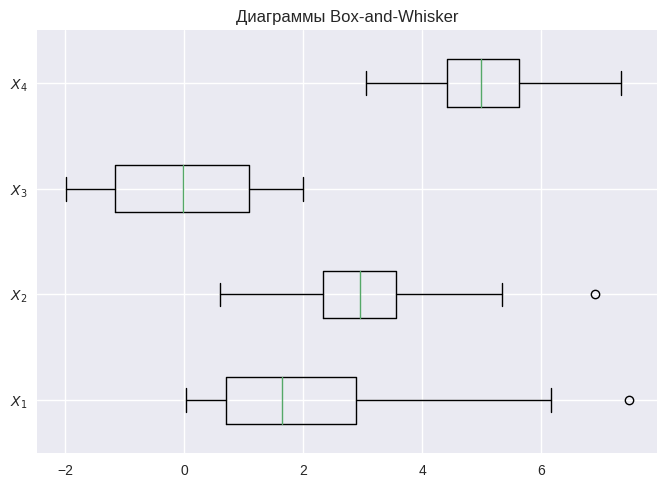

In [7]:
plt.boxplot(
    X,
    labels=[r"$X_1$", r"$X_2$", r"$X_3$", r"$X_4$"],  
    vert=False,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markeredgecolor="black"),
)

plt.title("Диаграммы Box-and-Whisker")
plt.show()


## 3. Проверка условия применимости дисперсионного анализа

Статистическая гипотеза: $H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$

In [8]:
z, p_value = stats.bartlett(X1, X2, X3, X4)

mprint(
    r"### Bartlett’s test",
    r"$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$",
    fr"$z_{{выб}} = {z:.2f}$",
    fr"$p = {p_value:.4g}$",   
    verdict(alpha, p_value),
)


### Bartlett’s test

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$

$z_{выб} = 49.95$

$p = 8.187e-11$

$H_0$ отклоняется

Критерий Бартлетта:

| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------- | ------------------------------ |
| 49.95                                     | 0.00     | $𝐻_0$ отклоняется                                         | Нет                            |


## 4. Однофакторный дисперсионный анализ

In [9]:
S_general = X_pooled.var()
S_inside = 1 / n_pooled * sum([n[i] * X[i].var() for i in range(k)])
S_between = S_general - S_inside

S_general_unbiased = S_general * n_pooled / (n_pooled - 1)
S_inside_unbiased = S_inside * n_pooled / (n_pooled - k)
S_between_unbiased = S_between * n_pooled / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 3.40$

$\tilde{D}_{\text{внутр}} = 1.42$

$\tilde{D}_{\text{общ}} = 4.82$

$\tilde{D}_{\text{межгр, несмещ}} = 623.12$

$\tilde{D}_{\text{внутр, несмещ}} = 1.43$

$\tilde{D}_{\text{общ, несмещ}} = 4.83$

Таблица дисперсионного анализа:

| Источник вариации      | Показатель вариации                         | Число степеней свободы                        | Несмещённая оценка                                                    |
| ---------------------- | ------------------------------------------- | --------------------------------------------- | --------------------------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 3.40$           | $k-1 = 3$                                     | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 623.12$                    |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 1.42$           | $n-k = 550-4 = 546$                           | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 1.43$                    |
| Все факторы            | $\tilde{D}_{\text{общ}} = 4.82$             | $n-1 = 549$                                   | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 4.83$                      |


In [10]:
eta_squared = S_between / S_general

eta = sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.71$

$\tilde{\eta} = 0.84$

Эмпирирический коэффициент детерминации 
$$\tilde{\eta^2} = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}} = 0.71$$

Эмпирическое корреляционное отношение 
$$\tilde{\eta} = \sqrt{\tilde{\eta^2}} = 0.84$$


Статистическая гипотеза: $H_0: m_1 = m_2 = m_3 = m_4 = m_4$

In [11]:
z = S_between_unbiased / S_inside_unbiased
p_value = stats.f.sf(z, k - 1, n_pooled - k)

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3 = m_4$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
    verdict(alpha, p_value),
)


### ANOVA

$H_0: m_1 = m_2 = m_3 = m_4$

$z_{выб} = 436.40$

$p = 0.00$

$H_0$ отклоняется

| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------- | ------------------------------ |
| 436.40                                     | 0.00     | $H_0$ отклоняется                                         | Нет                            |


## Метод линейных контрастов

### Доверительные интервалы для $m_1, \dots, m_k$

In [12]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
for data, N, i in zip(X, n, range(1, k + 1)):
    std_err = stats.sem(data)
    intervals[f"$X_{i}$"] = stats.t.interval(
        1 - alpha, df=N - 1, loc=np.mean(data), scale=std_err
    )

intervals

,$X_1$,$X_2$,$X_3$,$X_4$
Нижняя граница,1.666656,2.823445,-0.210895,4.815455
Верхняя граница,2.316074,3.139861,0.128444,5.164486


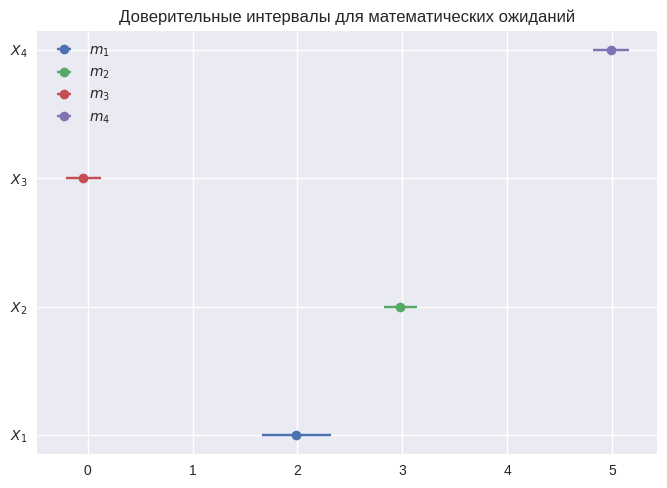

In [13]:
for interval, y in zip(intervals.columns, range(1, k + 1)):
    plt.errorbar(
        intervals[interval].mean(),
        y,
        xerr=(intervals[interval].mean() - intervals[interval].iloc[0]),
        fmt="o",
        label=f"$m_{y}$",
    )

plt.yticks(range(1, k + 1), [f"$X_{i}$" for i in range(1, k + 1)])
plt.legend(loc="upper left")
plt.title("Доверительные интервалы для математических ожиданий")
plt.show()

### Попарные сравнения $m_i$ и $m_j$

In [14]:
grouped = pd.DataFrame({"data": X_pooled, "group": np.repeat(range(1, k + 1), n)})
grouped

,data,group
0,2.958613,1
1,2.917242,1
2,6.162034,1
3,3.886762,1
4,1.823502,1
...,...,...
545,4.261747,4
546,5.316776,4
547,5.278147,4
548,5.782645,4


In [15]:
result = pairwise_tukeyhsd(endog=grouped["data"], groups=grouped["group"], alpha=alpha)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.9903   0.0  0.5928  1.3878   True
     1      3  -2.0326   0.0 -2.4097 -1.6555   True
     1      4   2.9986   0.0  2.5631  3.4341   True
     2      3  -3.0229   0.0 -3.3555 -2.6903   True
     2      4   2.0083   0.0  1.6108  2.4059   True
     3      4   5.0312   0.0  4.6541  5.4083   True
---------------------------------------------------


In [16]:
df = pd.DataFrame(
    data=result._results_table.data[1:],
    columns=[
        "m_i",
        "m_j",
        "z",
        "p-value",
        "lower",
        "upper",
        "Отклонение H_0",
    ],
)

df

,m_i,m_j,z,p-value,lower,upper,Отклонение H_0
0,1,2,0.9903,0.0,0.5928,1.3878,True
1,1,3,-2.0326,0.0,-2.4097,-1.6555,True
2,1,4,2.9986,0.0,2.5631,3.4341,True
3,2,3,-3.0229,0.0,-3.3555,-2.6903,True
4,2,4,2.0083,0.0,1.6108,2.4059,True
5,3,4,5.0312,0.0,4.6541,5.4083,True


| Гипотеза          | Выборочное значение статистики критерия | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ----------------- | --------------------------------------- | ------------------------------------------- | ------------------------------ |
| $H_0:\ m_1 = m_2$ | 1.00                                     | $H_0$ отклоняется                                         | Нет                            |
| $H_0:\ m_1 = m_3$ | -2.03                                     | $H_0$ отклоняется                                         | Нет                            |
| $H_0:\ m_1 = m_4$ | 3.00                                     | $H_0$ отклоняется                                         | Нет                            |
| $H_0:\ m_2 = m_3$ | -3.02                                     | $H_0$ отклоняется                                         | Нет                            |
| $H_0:\ m_2 = m_4$ | 2.00                                     | $H_0$ отклоняется                                         | Нет                            |
| $H_0:\ m_3 = m_4$ | 5.03                                     | $H_0$ отклоняется                                         | Нет                            |
